#### knn alghorithm example

##### import library

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

#### read csv file

In [102]:
df=pd.read_csv("teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


#### get number if custcat

In [103]:
df["custcat"].value_counts()

# category          number of category
# 3                   281
# 1                   266
# 4                   236
# 2                   217

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

##### convert pandas dataType to array

In [104]:
x=df[["region","tenure","age","marital","address","income","ed","retire"]]
x=np.asanyarray(x)
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   0.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   0.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,   0.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   0.]])

##### convert pandas dataType to array

In [105]:
y=df["custcat"]
y=np.asanyarray(y)
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

##### normalize data

In [106]:
print(x[0:5])
normalize_data=preprocessing.StandardScaler()
x=normalize_data.fit(x).transform(x.astype(float))
print(x[0:5])

[[  2.  13.  44.   1.   9.  64.   4.   0.]
 [  3.  11.  33.   1.   7. 136.   5.   0.]
 [  3.  68.  52.   1.  24. 116.   1.   0.]
 [  2.  33.  33.   0.  12.  33.   2.   0.]
 [  2.  23.  30.   1.   9.  30.   1.   0.]]
[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.22207644]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.22207644]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088 -0.22207644]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -0.22207644]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.22207644]]


#### train and test data

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, train_size=0.8, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 8) (800,)
Test set: (200, 8) (200,)


#### start work with knn alghorithm

In [140]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=4)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

#### predict new data

In [141]:
x_new=np.array([[2,58,20,0,6,78.14,3,0.0]])
y_new=model.predict(x_new)
y_new

array([3], dtype=int64)

#### Evaluating the Model by test data

In [142]:
y_predict=model.predict(x_test)
print(f"test set predict by machine : {y_predict}")

test set predict by machine : [1 3 1 4 4 1 3 4 4 4 1 4 4 3 1 1 3 2 4 4 3 3 1 1 4 4 2 2 1 2 3 4 4 1 1 2 1
 1 3 2 1 2 3 2 2 1 3 2 4 2 1 1 1 1 2 2 3 1 4 4 1 4 2 3 4 1 4 2 2 4 1 3 3 3
 1 4 4 2 2 2 2 1 1 1 4 2 3 3 3 1 1 4 1 1 4 1 2 2 1 3 3 1 1 1 1 4 3 3 2 1 1
 1 3 2 1 3 1 3 3 1 1 1 2 1 1 2 4 4 1 2 3 1 1 3 3 3 3 4 1 3 1 3 1 1 1 2 4 1
 2 2 1 2 2 2 2 3 3 3 1 3 2 1 1 1 3 1 4 3 3 4 3 1 2 2 2 2 1 1 1 1 1 2 1 1 2
 3 1 3 1 1 1 1 1 1 3 4 1 1 3 1]


#### Accuracy  predict y by machine and real y

In [143]:
from sklearn import metrics
accuracy_model=metrics.accuracy_score(y_test, y_predict)
accuracy_model

0.34

#### accurecy model by every k

In [199]:
# list of accuracy score our model for any k
accuracy = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):
    my_model = KNeighborsClassifier(n_neighbors=i)
    my_model.fit(x_train, y_train)
    y_predict = my_model.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_predict))

Text(0, 0.5, 'Mean accuracy')

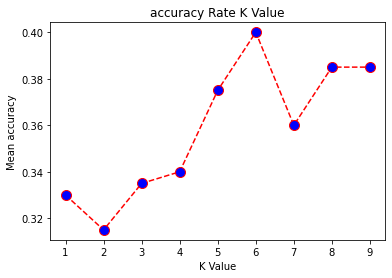

In [200]:
plt.plot(range(1, 10), accuracy, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean accuracy')